# Анализ рынка общепита Москвы для сети кофеен «Шоколадница»

### Цели и задачи проекта

Цель проекта — проанализировать заведения общественного питания в Москве, чтобы помочь заказчику (сети кофеен «Шоколадница») определиться с типом и форматом новых заведений, оценить конкурентную среду и выбрать подходящие районы для открытия.
   

### Описание данных
Файл rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- seats — количество посадочных мест.

Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
    и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

## 1. Загрузка данных и импорт библотек

In [67]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik==0.11.1
from phik import phik_matrix

Данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [61]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('data/rest_info.csv')
rest_price_df = pd.read_csv('data/rest_price.csv')

In [62]:
# Выводим первые строки датафрейма 'rest_info_df'
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [63]:
# Выводим информацию датафрейма 'rest_info_df'
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выводим первые строки датафрейма 'rest_price_df'
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию датафрейма 'rest_price_df'
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

* Датасет "rest_info_df" 8406 строк и 8 столбцов, данные представлены тремя типами: object, float64 и int64. В столбцах hours, seats имеются пропуски, примерно 10%.
* Датасет 'rest_price_df' состоит из 4058 строк и 5 столбцов, данные представлены двумя типами: object, float64. Пропуски присутствуют в 4 столбцах из 5. 
* На основе этих данных можно сделать вывод о том, что у нас отсутвуют данные о ценах почти у половины заведений 

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым родолжим работу.

In [7]:
# Объдиняем два датафрейма в один 
df = rest_info_df.merge(rest_price_df, on = 'id', how = 'left')

In [8]:
# Выведем первые строки нового датафрейма
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# Выведем информацию нового датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовка данных к исследовательскому анализу:

- Необходимо изучить корректность типов данных, при необходимости провести их преобразование.

In [10]:
# Приведем столбец 'chain' к булевому типу
df["chain"] = df["chain"].astype(bool)

In [11]:
# Приведем столбец 'seats' к целочисленному типу
df["seats"] = df["seats"].astype("Int64")

- Изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположим гипотезы их появления. Проведим обработку пропущенных значений.

In [12]:
# Выводим количество нулевых значений
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

1. hours. Нет данных о времени работы: 536. Может быть связано с тем, что владелец заведения не указал время работы в Яндекс картах или заведение больше не работает.
2. seats. У 3611 заведений нет данных о количестве посадочных мест. В целом не многие заведения указывают этот параметр, так как пользователь по фотографиям может оценить размер заведения, да и в целом этот параметр не является обязательным и необходимым.
3. price. 5091 пропуск в столбце с категорией цен. Тут может быть несколько причин по которым данные значения отсвуют. Владелец не указал информацию о своем заведении. Если заведение было недавно открыто, то недостаточно информации, чтобы присвоить определенную категорию. Возможно не сработало автоматическое определение, которое на основе отзывов и данных может присвоить заведению ту или иную категорию. Либо же заведение не имеет четкую ценовую категорию и разница в ценах на товары слишком разная.
4. avg_bill. 4590 пропуск. Средняя стоимость заказа в виде диапазона имеет 4590 пропусков. Тут такая же ситуация как и с категорией цен.
5. middle_avg_bill. Пропуски в 5257 строках. Данные в этом столбце зависят от avg_bill. 
6. middle_coffee_cup. 7871 пропуск. Данные также зависят от avg_bill, но не все заведения указывают цену на кофе, в большей степени это относится к кофейням, которым необходимо указывать цену на кофе. 

In [13]:
# Выведем строки с нулевым значением в столбце 'hours' 
df[df['hours'].isna()].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,False,<NA>,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,False,<NA>,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,True,8,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,False,<NA>,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,False,<NA>,NaN,NaN,NaN,NaN


- Проверим данные на явные и неявные дубликаты. Для оптимизации проверки нормализуем данные в текстовых столбцах.

In [14]:
# Приведем все значения в столбце 'name' и 'address' к нижнему регистру и удаление лишних пробелов
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()

In [15]:
# Проверка явных дубликатов по столбцам 'name' и 'address'
duplicates = df[df.duplicated(subset = ['name', 'address'])]
duplicates.head() 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,False,<NA>,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,False,276,NaN,NaN,NaN,NaN


In [16]:
# Подсчитаем количество строк, где в столбце 'name' значение равно 'cafe', 'кафе' и пропуск
count_cafe = df[df['name'] == 'cafe'].shape[0]
print(count_cafe)
count_cafe = df[df['name'] == 'кафе'].shape[0]
print(count_cafe)
count_cafe = df[df['name'] == ''].shape[0]
print(count_cafe)

3
189
0


In [17]:
# Выведем явные дубликаты, у которых равны значения 'name' и 'address'
df[['name', 'address']].value_counts().head()

name                       address                                   
хлеб да выпечка            москва, ярцевская улица, 19                   2
more poke                  москва, волоколамское шоссе, 11, стр. 2       2
раковарня клешни и хвосты  москва, проспект мира, 118                    2
кафе                       москва, парк ангарские пруды                  2
нам                        москва, саввинская набережная, 19, стр. 1а    1
dtype: int64

In [18]:
# Посчитаем количество дубликатов
df.duplicated(subset = ['name', 'address']).sum()

4

In [19]:
# Проверим на неявный дубликат заведение с типовым названием 'кафе' и адресом 'москва, парк ангарские пруды'
df[(df['name'] == 'кафе') & (df['address'].str.contains('парк ангарские пруды'))]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,False,<NA>,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,False,<NA>,NaN,NaN,NaN,NaN


Видим, что данное значение является дубликатом, так как рейтинг у этих двух заведений одинаковый, а отличие только во времени работы, которое могло измениться по нескольким причинам. 

In [20]:
# Считаем количество дубликатов
df.duplicated(subset = ['name', 'address']).sum()

4

In [21]:
# Очищаем датафрейм от дубликатов
df = df.drop_duplicates(subset = ['name', 'address'])

- Создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно.

In [22]:
df['is_24_7'] = df['hours'].astype(str).str.contains('ежедневно, круглосуточно', na=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   bool   
 8   seats              4792 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8402 non-null   bool   
dtypes: Int64(1), bool(2), float64(3), object(8)
memory usage: 877.9+ KB


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Было удалено 4 дубликата. Преобразовали типы данных в столбцах chain к булевому, а seats к целочисленному типу, навзвания столбоцов приведены к единому типу 

Для того, чтобы не искажать данные, пропуски не были заменены

## 3. Исследовательский анализ данных
Проведение исследовательского анализа исходных данных.

При исследовании данных используем визуализации. Для каждого случая подобран оптимальный тип визуализации с корректным оформлением.

---

### 1. Распределение объектов по категориям

Цель — проанализировать количество объектов общественного питания в разрезе категорий.  
Результат поможет оценить, какие типы заведений наиболее распространены.

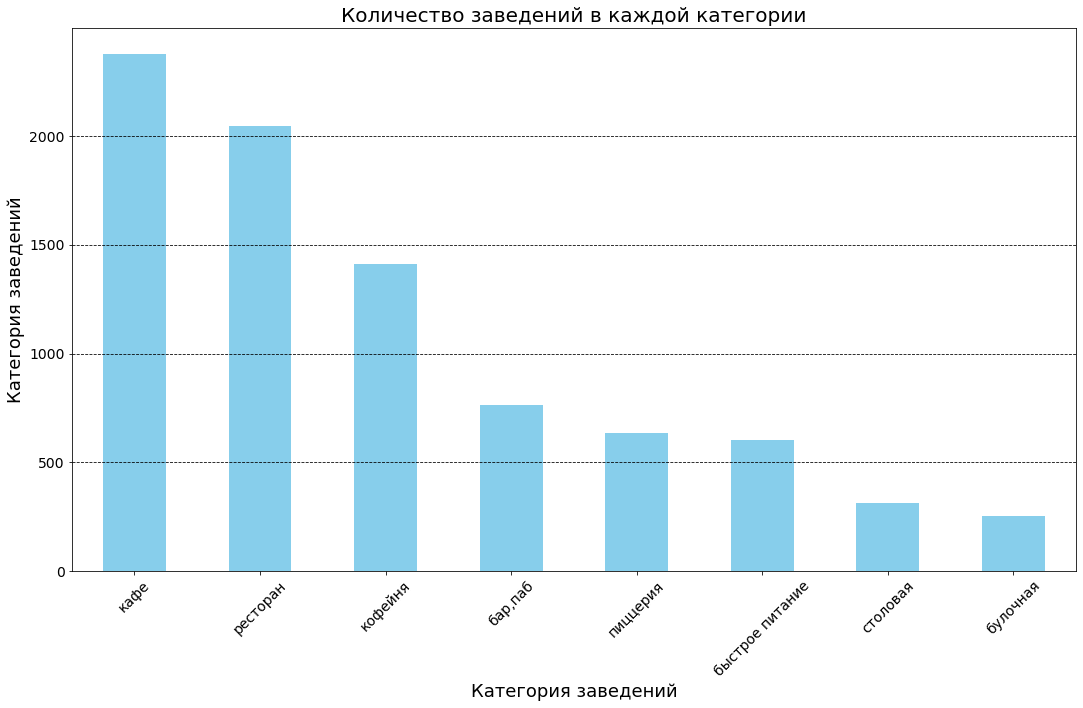

In [24]:
# Группируем данные по категориям и считаем количество заведений
category_counts = df['category'].value_counts()

# Строим график
category_counts.plot(
    kind='bar',
    title='Количество заведений в каждой категории',
    color='skyblue',
    figsize=(18, 10),
    rot=45,
    fontsize=14,
)

# Добавим пунктирную линию
plt.grid(axis='y', linestyle='--', alpha=1, color='black')

# Зададим названия
plt.title('Количество заведений в каждой категории', fontsize=20)
plt.xlabel('Категория заведений', fontsize=18) 
plt.ylabel('Категория заведений', fontsize=18) 

# Построим график
plt.show()

In [25]:
print(df['category'].value_counts())

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64


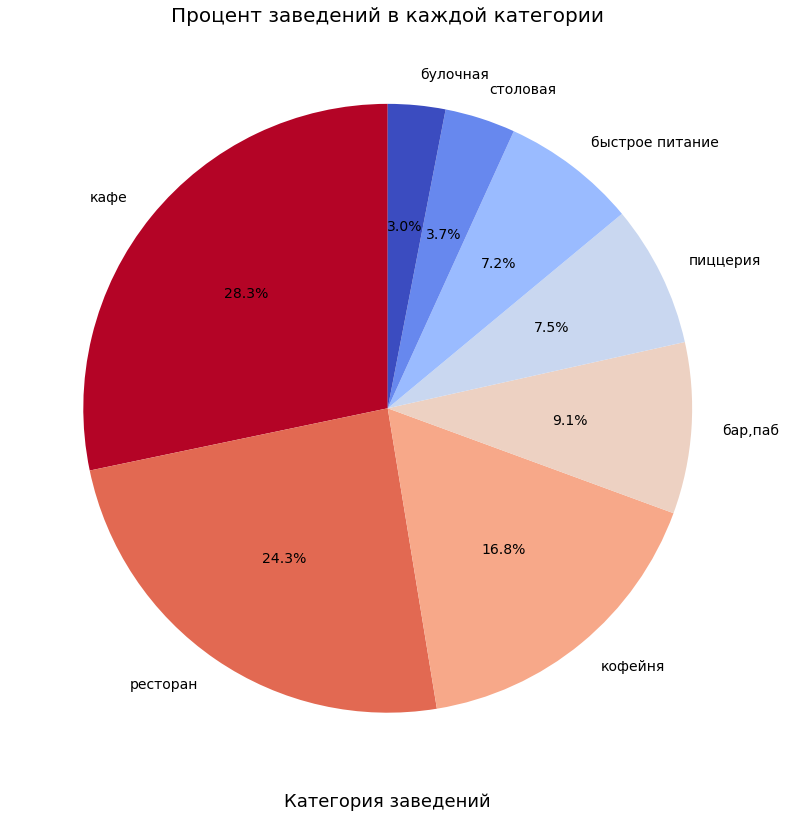

In [26]:
# Построим круговую диаграмму
df['category'].value_counts(normalize=True).plot(
    kind='pie', 
    autopct='%1.1f%%',
    startangle=90, 
    cmap='coolwarm_r', 
    figsize=(14, 14),
    fontsize=14
)

# Зададим названия
plt.title('Процент заведений в каждой категории', fontsize=20)
plt.xlabel('Категория заведений', fontsize=18) 
plt.ylabel('') 

# Построим диаграмму
plt.show()

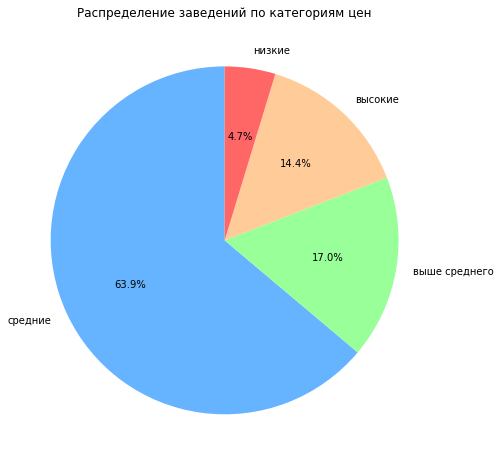

In [27]:
import matplotlib.pyplot as plt

# Рассчитываем количество заведений по категориям цен
price_counts = df['price'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#ffb3e6'])
plt.title('Распределение заведений по категориям цен')

# Отображаем график
plt.show()

* Самая популярная категория заведений - кафе, практически 2400 точек, около 30% от общего числа заведений. 
* На втором месте рестораны, их около 2000 (24%) от всех заведений. 
* Третье место у кофеен, их почти 1500 (16,8%). 
* Баров и пабов около 750 (9.1%). 
* Пиццерий и фастфудов 633 и 603 (7.5% и 7.2%). 
* Меньше всего столовых и булочные 315 и 256 (3.7% и 3%).

---

### 2. Распределение заведений по административным районам Москвы

Цель — проанализировать распределение количества заведений по административным округам Москвы.  
Дополнительно будет рассмотрено распределение заведений по категориям в пределах Центрального административного округа.

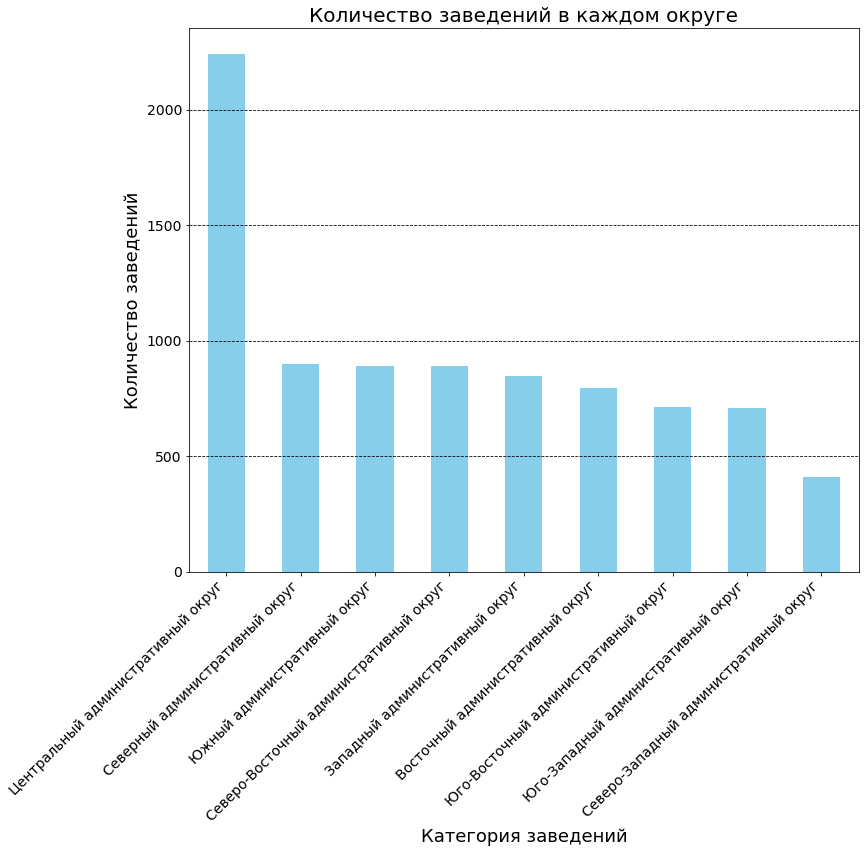

In [28]:
# Группируем данные по категориям и считаем количество заведений
district_counts = df['district'].value_counts()

# Строим график
district_counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(12, 10),
    fontsize=14
)

# Добавим пунктирную линию
plt.grid(axis='y', linestyle='--', alpha=1, color='black')

# Зададим названия и увеличим шрифт
plt.title('Количество заведений в каждом округе', fontsize=20)
plt.xlabel('Категория заведений', fontsize=18) 
plt.ylabel('Количество заведений', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Построим график
plt.show()

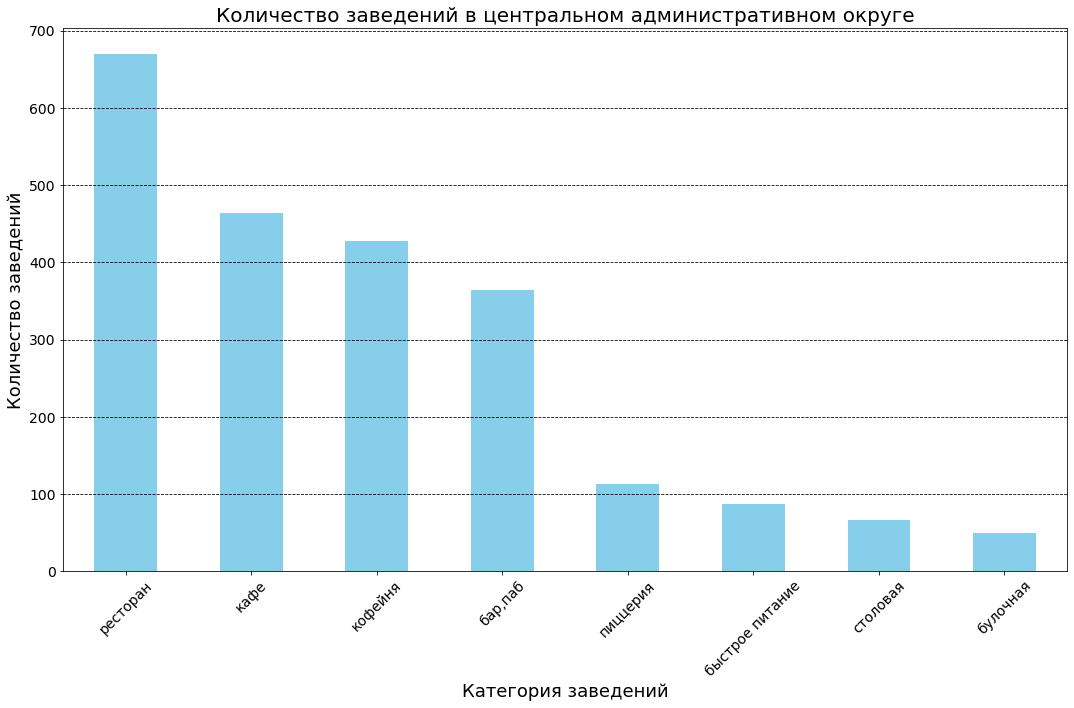

In [29]:
# Группируем данные по центральному административному округу и считаем количество заведений в нем
df_cao = df[df['district'] == 'Центральный административный округ']

counts = df_cao['category'].value_counts()

# Строим график
counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(18, 10),
    fontsize=14,
    rot=45
)

# Добавим пунктирную линию
plt.grid(axis='y', linestyle='--', alpha=1, color='black')

plt.title('Количество заведений в центральном административном округе', fontsize=20)
plt.xlabel('Категория заведений', fontsize=18) 
plt.ylabel('Количество заведений', fontsize=18) 

# Построим график
plt.show()

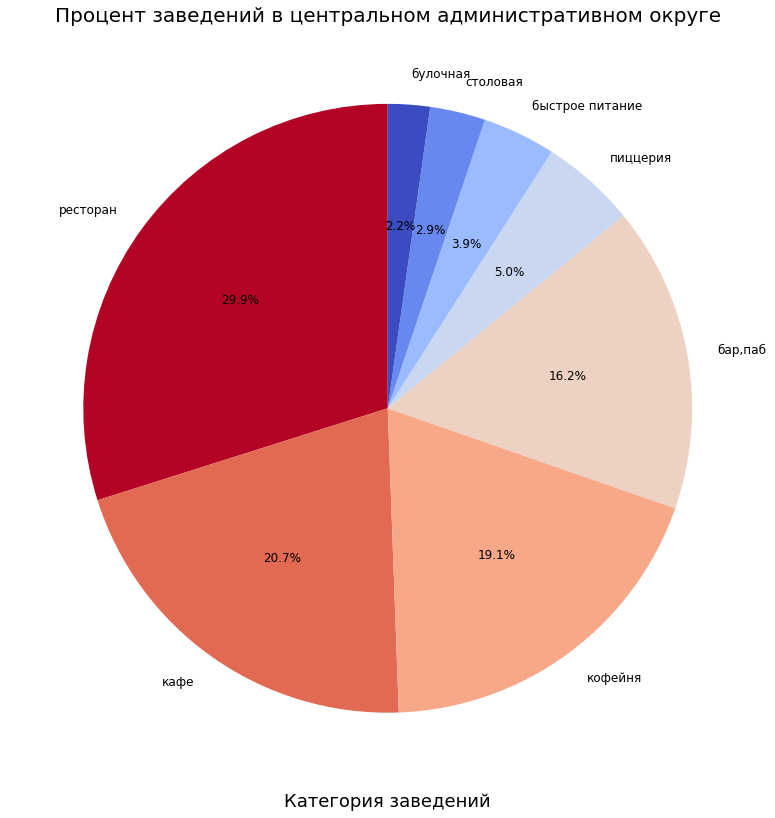

In [30]:
# Группируем данные по категориям и считаем количество заведений
df_cao = df[df['district'] == 'Центральный административный округ']

# Построим круговую диаграмму
df_cao['category'].value_counts(normalize=True).plot(
    kind='pie', 
    autopct='%1.1f%%',
    startangle=90, 
    cmap='coolwarm_r', 
    figsize=(14, 14),
    fontsize=12
)

# Зададим названия
plt.title('Процент заведений в центральном административном округе', fontsize=20)
plt.xlabel('Категория заведений', fontsize=18) 
plt.ylabel('') 

# Построим диаграмму
plt.show()

Что касается распределения по категориям цен, то тут преобладает средний сегмент, он составляет почти 64%, на втором месте «выше среднего» 17%, высокие цены у 14.4% заведений и меньше всего «низкие» 4.7%.

---

### 3. Анализ сетевых и несетевых заведений

Цель - проанализировать распределение сетевых и несетевых заведений в выборке в целом и по категориям.  
Необходимо определить, каких заведений больше - сетевых или несетевых, а также выяснить, какие категории чаще всего представлены.

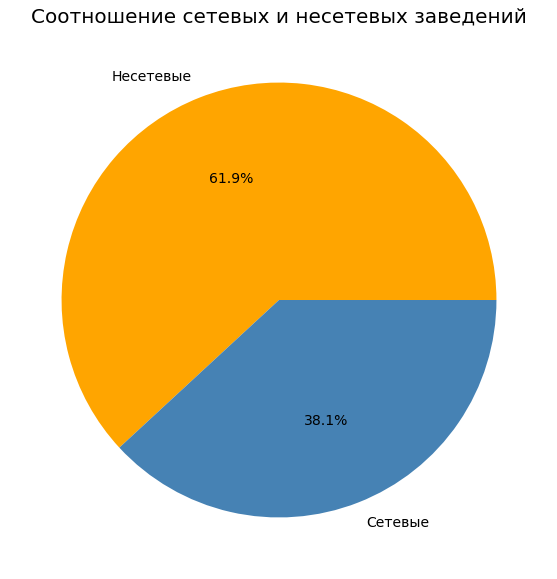

In [31]:
chain_counts = df['chain'].value_counts(normalize=True) * 100
chain_counts = chain_counts.rename(index={True: 'Сетевые', False: 'Несетевые'})

chain_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['orange', 'steelblue'],
    figsize=(10, 10),
    fontsize=14
)

plt.title('Соотношение сетевых и несетевых заведений', fontsize=20)
plt.ylabel('')  # Убираем название оси
plt.show()

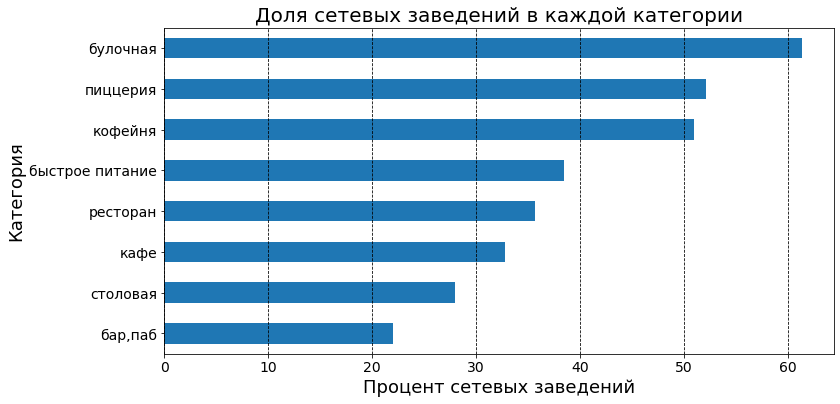

In [32]:
chain_by_category = (df.groupby('category')['chain'].mean().sort_values()) * 100


chain_by_category.plot(
    kind='barh',
    figsize=(12, 6),
    fontsize=14
)

plt.grid(axis='x', linestyle='--', alpha=1, color='black')

plt.title('Доля сетевых заведений в каждой категории', fontsize=20)
plt.xlabel('Процент сетевых заведений', fontsize=18)
plt.ylabel('Категория', fontsize=18)
plt.show()

* Сетевые заведения составляют 38% от всего числа примерно 3200 точек. 
* Большая часть приходится на булочные 62%, пиццерии 52%, кофейни 51%.  
* Меньше всего сетевых баров, пабов, около 22%. 

---

### 4. Анализ количества посадочных мест

Цель - проанализировать распределение количества посадочных мест в заведениях.  
Необходимо определить наличие выбросов или аномальных значений, предположить возможные причины их появления.  
Также будет определено типичное количество посадочных мест для каждого типа заведения.  
Результаты визуализированы для наглядности.


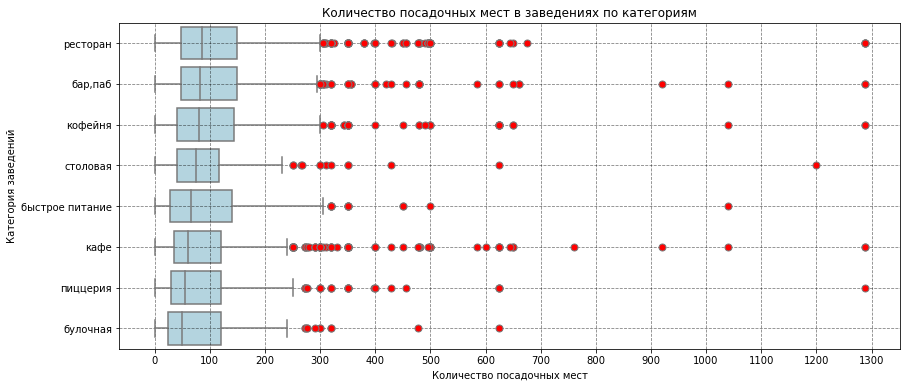

In [33]:
plt.figure(figsize=(14, 6))

category_order = df.groupby('category')['seats'].median().sort_values(ascending=False).index


# Строим boxplot и добавляем выбросы
sns.boxplot(
    x='seats', 
    y='category', 
    data=df, 
    order=category_order,
    showfliers=True,  # Включаем отображение выбросов
    color='lightblue',
    flierprops=dict(marker='o', markerfacecolor='red', markersize=7)  # Настройка выбросов
)

plt.title('Количество посадочных мест в заведениях по категориям')
plt.ylabel('Категория заведений')
plt.xlabel('Количество посадочных мест')


plt.grid( linestyle='--', alpha=0.5, color='black')

# Сделаем шаг равный 100
plt.xticks(range(0, df['seats'].max() + 100, 100))

# Показываем график
plt.show()

In [34]:
category_seats = df.groupby('category')['seats'].agg(['mean', 'median','max']).sort_values('median', ascending=False)
print(category_seats)

                       mean  median   max
category                                 
ресторан         121.892041    86.0  1288
бар,паб          124.477516    82.0  1288
кофейня          111.199734    80.0  1288
столовая              99.75    75.5  1200
быстрое питание   98.891117    65.0  1040
кафе              97.365653    60.0  1288
пиццерия          94.496487    55.0  1288
булочная          89.385135    50.0   625


In [35]:
mediana_seats = df['seats'].median()
print(mediana_seats)
mediana_seats = df['seats'].mean()
print(mediana_seats)

75.0
108.36143572621035


В данных о количестве посадочных мест были ощутимые выбросы в каждом столбце. Так например максимальное число мест почти в каждой категории равно 1288, что вряд ли может быть, поэтому опираться на среднее значение посадочных мест будет ошибка. Медианное значение больше похоже на правду. Среднее количество посадочных мест в каждой категории равно 75, а вот среднее 108.


---

### 5. Анализ рейтингов заведений

Цель - исследовать распределение рейтинга по категориям заведений общественного питания.  
Также сравним средний рейтинг между различными категориями заведений.

In [36]:
# Проверим среднее и медианное значения, а также убедимся, что максимальная оценка в каждой категории равна 5
average_ratings = df.groupby('category')['rating'].agg(['mean', 'median','max'])
# Округлим до одного значения после запятой
average_ratings['mean'] = average_ratings['mean'].round(1)
print(average_ratings)

                 mean  median  max
category                          
бар,паб           4.4     4.4  5.0
булочная          4.3     4.3  5.0
быстрое питание   4.1     4.2  5.0
кафе              4.1     4.2  5.0
кофейня           4.3     4.3  5.0
пиццерия          4.3     4.3  5.0
ресторан          4.3     4.3  5.0
столовая          4.2     4.3  5.0


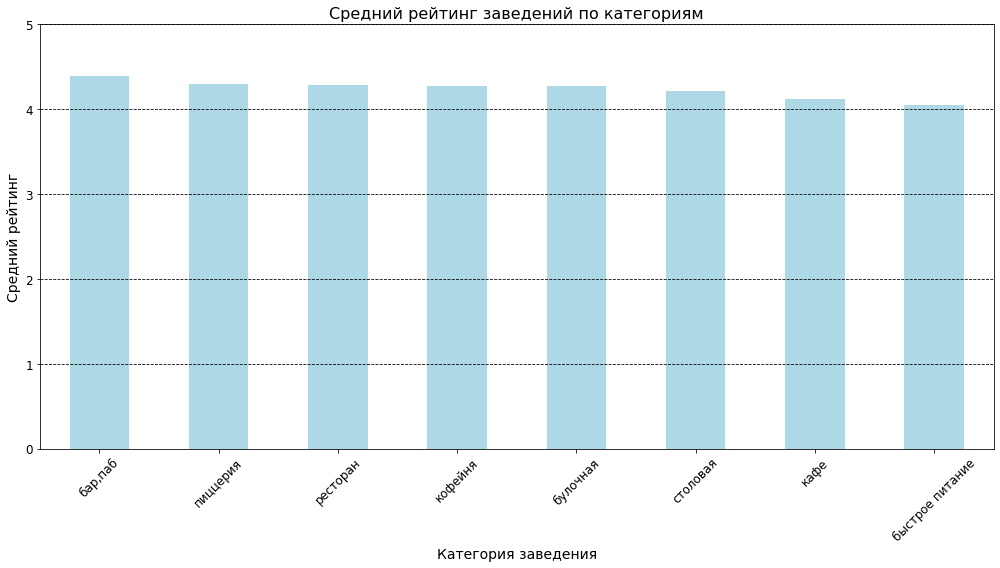

In [37]:
# Группируем данные по категориям и к каждой категории выводим средний рейтинг
average_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Строим график для отображения средних рейтингов в каждой категории
average_ratings.plot(kind='bar', 
                     fontsize=12, 
                     figsize=(14, 8),
                     color='lightblue',
                     rot=45)

# Добавляем подписи и заголовок
plt.title('Средний рейтинг заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Средний рейтинг', fontsize=14)

# Зададим минимальное (0) и максимальное (5) значние по вертикали
plt.ylim(0, 5) 


plt.grid(axis='y', linestyle='--', alpha=1, color='black')

# Показываем график
plt.tight_layout()
plt.show()

* Средние рейтинги заведений по категориям варьируются от 4.1 до 4.4.
* Наибольшее среднее значение наблюдается у категории «бар, паб» — 4.4.
* Наименьший средний рейтинг зафиксирован у категорий «кафе» и «фастфуд» — 4.1.

---

### 6. Изучение корреляции

Цель - выяснить, с какими данными самая сильная корреляция рейтинга заведения. Для наглядности необходимо визуализировать матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 

interval columns not set, guessing: ['rating', 'seats']


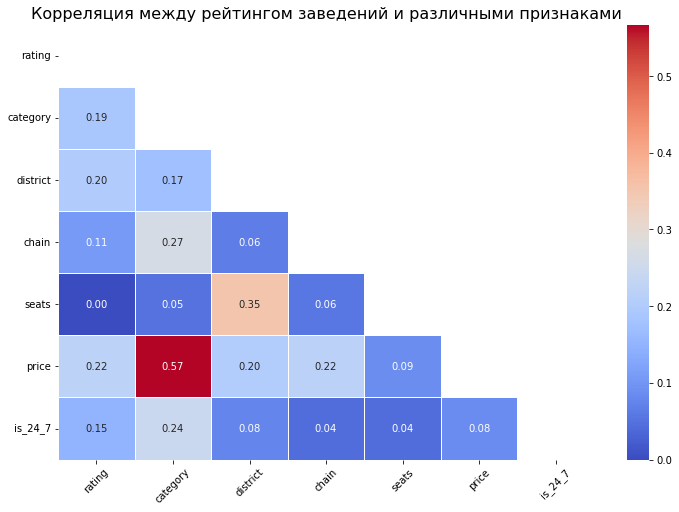

rating      1.000000
price       0.220295
district    0.200761
category    0.189716
is_24_7     0.150365
chain       0.107833
seats       0.000000
Name: rating, dtype: float64


In [38]:
categorical_columns = ['category', 'district', 'chain', 'price', 'is_24_7']
numerical_columns = ['seats', 'rating']

df_for_corr = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']]

# Рассчитываем корреляционную матрицу с помощью phik
corr_matrix_phik = df_for_corr.phik_matrix()

mask = np.triu(np.ones_like(corr_matrix_phik, dtype=bool))
# Строим тепловую карту корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_phik, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, mask=mask)


# Заголовок графика
plt.title('Корреляция между рейтингом заведений и различными признаками', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Посмотрим на самую сильную корреляцию с рейтингом
corr_with_rating = corr_matrix_phik['rating'].sort_values(ascending=False)
print(corr_with_rating)

In [39]:
# Группируем данные по категории цен и считаем среднюю оценку
average_rating_by_price = df.groupby('category')['middle_avg_bill'].mean().reset_index()

# Выводим результат
print(average_rating_by_price)

          category  middle_avg_bill
0          бар,паб      1338.762178
1         булочная       658.773585
2  быстрое питание       445.763713
3             кафе       707.753602
4          кофейня       614.210000
5         пиццерия       789.377215
6         ресторан      1367.881731
7         столовая       335.348066


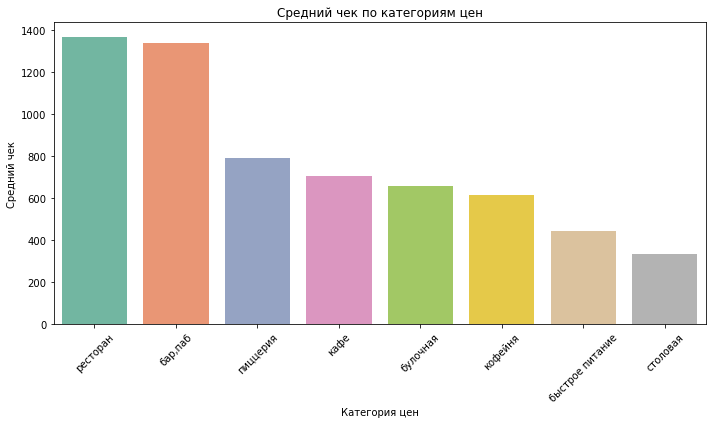

In [40]:
average_rating_by_price = average_rating_by_price.sort_values('middle_avg_bill', ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(data=average_rating_by_price, x='category', y='middle_avg_bill', palette='Set2')

# Добавляем подписи
plt.xlabel('Категория цен')
plt.ylabel('Средний чек')
plt.title('Средний чек по категориям цен')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Самая сильная корреляция замечена между категорией заведения и ценовой категорией. Для проверки данной коррелеции возьмем вместо ценовой категории средний чек в каждой категории заведения и видим, что чем ниже уровень заведения, тем ниже средний чек

На графике хорошо видно, что в зависимости от категории заведения зависит и цена, чем ниже категория, тем ниже цена

---

### 7. ТОП-15 сетей Москвы

Цель - сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве. Для них посчитать значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе.

In [41]:
# Отберем только сетевые заведения
df_chain = df[df['chain'] == True]

In [42]:
# Группируем по названию заведения
chain_counts = df_chain.groupby('name')['id'].count()

In [43]:
# Переименуем столбец
chain_counts = chain_counts.reset_index().rename(columns={'id': 'count'})

In [44]:
# Отсортируем количество заведений по убыванию
top_chains = chain_counts.sort_values(by='count', ascending=False)

In [45]:
print(top_chains.head(15).to_string(index=False))

                               name  count
                        шоколадница    120
                     домино'с пицца     76
                         додо пицца     74
                   one price coffee     71
                       яндекс лавка     69
                              cofix     65
                              prime     50
                         хинкальная     44
                           кофепорт     42
кулинарная лавка братьев караваевых     39
                            теремок     38
                            чайхана     37
                           cofefest     32
                            буханка     32
                              му-му     27


In [46]:
chain_categories = df.groupby('name')['category'].first()

In [47]:
top_chains_with_category = top_chains.merge(chain_categories, on='name', how='left')

In [48]:
print(top_chains_with_category.head(15).to_string(index=False))

                               name  count        category
                        шоколадница    120         кофейня
                     домино'с пицца     76        пиццерия
                         додо пицца     74        пиццерия
                   one price coffee     71         кофейня
                       яндекс лавка     69        ресторан
                              cofix     65         кофейня
                              prime     50        ресторан
                         хинкальная     44 быстрое питание
                           кофепорт     42         кофейня
кулинарная лавка братьев караваевых     39            кафе
                            теремок     38        ресторан
                            чайхана     37            кафе
                           cofefest     32         кофейня
                            буханка     32        булочная
                              му-му     27            кафе


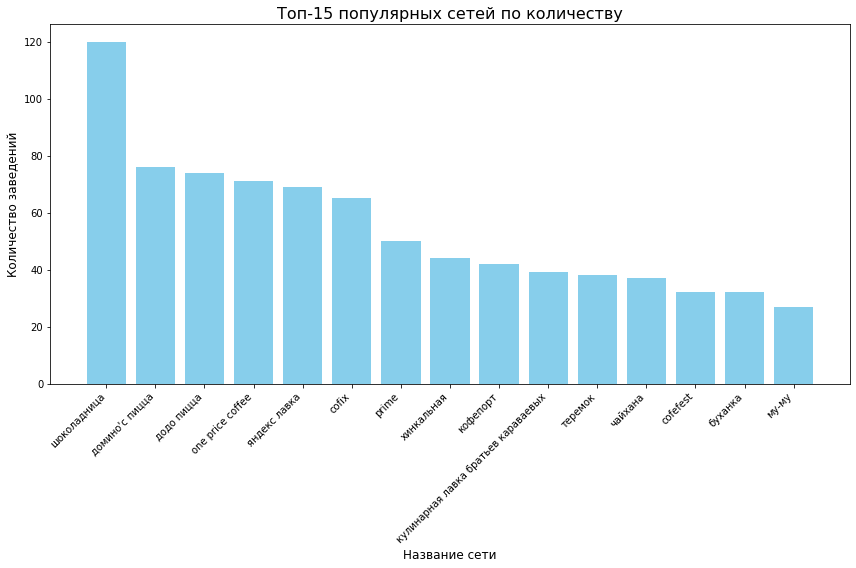

In [49]:
df_top_15 = top_chains_with_category.head(15)

plt.figure(figsize=(12, 8))

# Создаем столбчатую диаграмму
plt.bar(df_top_15['name'], df_top_15['count'], color='skyblue')

# Добавляем заголовок и метки
plt.title('Топ-15 популярных сетей по количеству', fontsize=16)
plt.xlabel('Название сети', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)

# Поворот меток по оси X, чтобы они не накладывались
plt.xticks(rotation=45, ha='right')

# Показываем график
plt.tight_layout()  # Подгоняем график, чтобы не обрезались метки
plt.show()

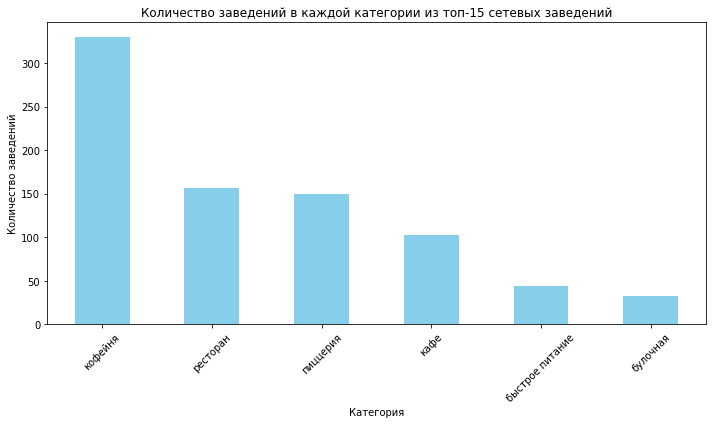

In [50]:
# Группируем по категории и считаем количество заведений в каждой категории из топ-15
category_counts = df_top_15.groupby('category')['count'].sum()

# Сортируем по убыванию
category_counts = category_counts.sort_values(ascending=False)

# Строим график
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', rot=45)

# Добавляем подписи к осям и заголовок
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.title('Количество заведений в каждой категории из топ-15 сетевых заведений')

# Показываем график
plt.tight_layout()
plt.show()

In [51]:
# Сгруппируем датафрейм по названию и для каждого найдем его средний рейтинг
avg_ratings = df.groupby('name')['rating'].mean()

In [52]:
# Добавим рейтинг в топ-15
avg_ratings = df_top_15.merge(avg_ratings, on='name', how='left')
avg_ratings.head()

,name,count,category,rating
0,шоколадница,120,кофейня,4.177500
1,домино'с пицца,76,пиццерия,4.171429
2,додо пицца,74,пиццерия,4.286486
3,one price coffee,71,кофейня,4.069444
4,яндекс лавка,69,ресторан,3.872464


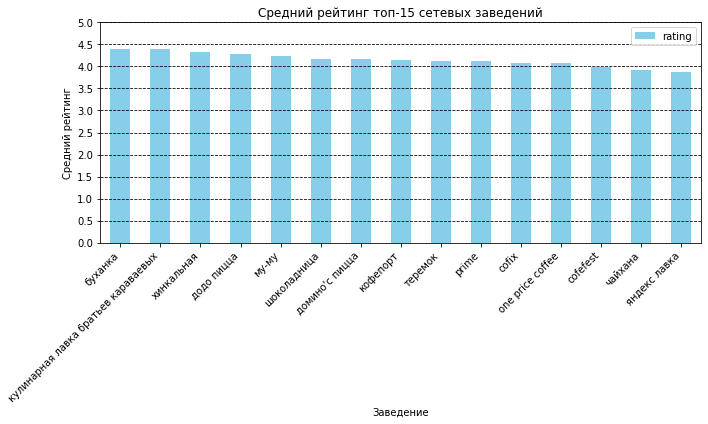

In [64]:
avg_ratings = avg_ratings.sort_values(by='rating', ascending=False)

# Строим график: явно указываем, что по X — 'name', по Y — 'rating'
avg_ratings.plot(
    x='name',
    y='rating',
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    rot=45
)

# Добавляем подписи к осям и заголовок
plt.xlabel('Заведение')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг топ-15 сетевых заведений')
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5.1, 0.5))

# Поворот меток по оси X, чтобы они не накладывались
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=1, color='black')

plt.tight_layout()
plt.show()

Самой популярной сетью в Москве является «Шоколадница» — в городе насчитывается 120 заведений этой сети. На втором месте — пиццерии «Домино’с Пицца» и «Додо Пицца» с 76 и 74 точками соответственно.

Если рассматривать топ-15 крупнейших сетей, можно выделить следующее:
* Преобладают кофейни - их суммарное количество превышает 300 точек.
* Рестораны и пиццерии представлены в два раза скромнее — примерно по 150 заведений.
* Кафе - около 100 точек.
* Меньше всего в топ-15 попало заведений фастфуда и булочных.
* Бары и пабы в топ-15 не входят.

Что касается среднего рейтинга, самая высокая средняя оценка у сети «Буханка» - её средний рейтинг составляет около 4.4. Большинство других сетей колеблются в диапазоне 4.0–4.5. Лишь три сети имеют рейтинг ниже или равный 4.0 — это Cofefest, Чайхана и Яндекс Лавка.

In [54]:
# Отфильтруем кофейни, исключив "Шоколадницу"
filtered_coffee = df[(df['category'] == 'кофейня') & (df['chain'] != 'Шоколадница')]

# Посчитаем медиану посадочных мест без "Шоколадницы"
median_without_shoko = filtered_coffee['seats'].median()

print(f"Медиана посадочных мест у кофеен без 'Шоколадницы': {median_without_shoko}")

Медиана посадочных мест у кофеен без 'Шоколадницы': 80.0


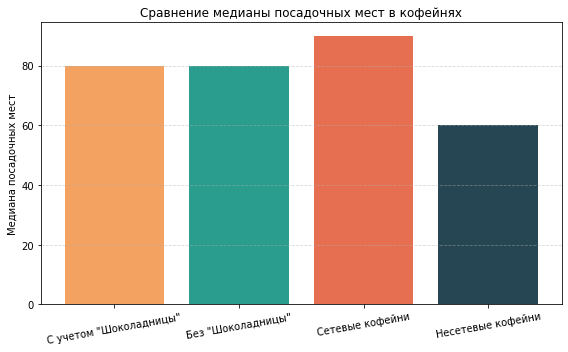

In [65]:
# Фильтруем кофейни
coffee = df[df['category'] == 'кофейня']

# Медианы:
median_with = coffee['seats'].median()

# Без Шоколадницы
coffee_wo_shoko = coffee[~coffee['name'].str.contains('Шоколадница', na=False)]
median_without = coffee_wo_shoko['seats'].median()

# Сетевые и не сетевые
# Предположим, что столбец называется 'is_chain' и принимает значения 1 и 0
median_chain = coffee[coffee['chain'] == 1]['seats'].median()
median_non_chain = coffee[coffee['chain'] == 0]['seats'].median()

# Визуализация
labels = ['С учетом "Шоколадницы"', 'Без "Шоколадницы"', 'Сетевые кофейни', 'Несетевые кофейни']
values = [median_with, median_without, median_chain, median_non_chain]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['#F4A261', '#2A9D8F', '#E76F51', '#264653'])
plt.ylabel('Медиана посадочных мест')
plt.title('Сравнение медианы посадочных мест в кофейнях')
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

### 8. Анализ среднего чека

Цель — проанализировать, как средний чек в заведениях различается в зависимости от административного района Москвы. Сравнить отдельно Центральный округ с остальными. Также выявить связь между удалённостью района от центра и уровнем цен в заведениях.


In [66]:
# Сгруппируем среднее и медианное значение по районам
average_check = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median'])

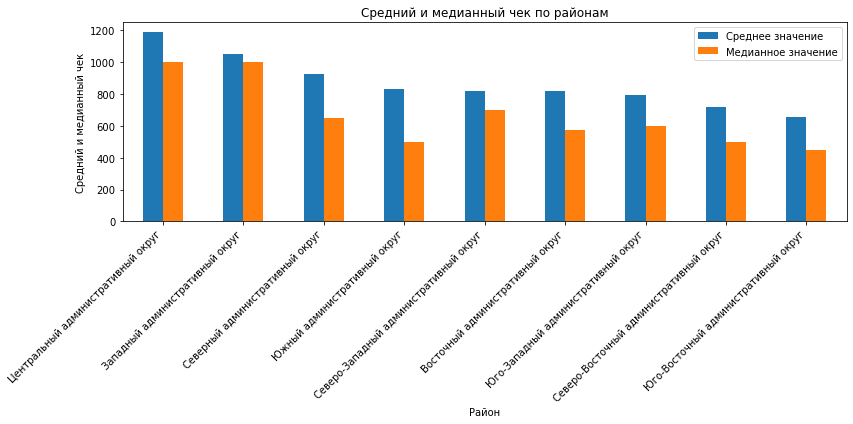

In [57]:
# Переименовываем столбцы
average_check = average_check.rename(columns={'mean': 'Среднее значение', 'median': 'Медианное значение'})

# Сортируем по убыванию
average_check = average_check.sort_values(by='Среднее значение', ascending=False)

# Строим столбчатую диаграмму
average_check.plot(kind='bar', y=['Среднее значение', 'Медианное значение'], figsize=(12, 6))

# Добавляем подписи к осям и заголовок
plt.xlabel('Район')
plt.ylabel('Средний и медианный чек')
plt.title('Средний и медианный чек по районам')
plt.xticks(rotation=45, ha='right')

# Показываем график
plt.tight_layout()
plt.show()

Удалённость от центра Москвы коррелирует с понижением цен в заведениях. Центральные районы ориентированы на более состоятельную аудиторию, в то время как в отдалённых округах преобладают более доступные заведения.

---

### Промежуточный вывод

Наиболее популярные категории заведений в Москве — кафе (30%), рестораны (24%) и кофейни (17%). Основной ценовой сегмент — средний (64% всех точек), на более высокий уровень приходится около 31%, а заведения с низкими ценами составляют лишь 5%. Примерно 38% заведений являются сетевыми, особенно это характерно для булочных, пиццерий и кофеен.

Средний чек существенно различается в зависимости от района. В Центральном административном округе он заметно выше — около 1200 рублей, тогда как в более отдалённых округах — 700–900 рублей. Это важно учитывать при выборе места: в центре целесообразно открывать заведение с более высоким чеком, в то время как в спальных районах — с доступным меню. Медианные значения часто ниже средних, что указывает на наличие отдельных дорогих заведений, искажая общую картину.

В данных о количестве посадочных мест наблюдаются аномалии, поэтому для анализа стоит ориентироваться на медиану: кафе и кофейни — около 60–80 мест, рестораны — около 86. Средние рейтинги заведений варьируются незначительно (4.1–4.4), с лучшими показателями у баров и пабов. Среди сетей лидирует «Шоколадница» (120 точек), за ней идут «Доминос» и «Додо Пицца». В топ-15 доминируют кофейни, рестораны и пиццерии.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы. В ходе исследования проанализированы данные о заведениях общественного питания в Москве, включая популярность категорий, ценовые сегменты, сетевые заведения, распределение по районам и характеристики заведений. Оценены данные о посадочных местах, рейтингах и популярных сетях.
2. Ответы на исследовательские вопросы, или главные выводы. Главные выводы:
	1.	Популярные категории: кафе (30%), рестораны (24%), кофейни (17%). Меньше всего столовых и булочных (менее 4%).
	2.	Ценовые сегменты: Средний ценовой сегмент — 64%, выше среднего — 17%, высокие цены — 14.4%, низкие — 4.7%.
	3.	Сетевые заведения: 38% заведений сетевые, особенно в категориях булочных, пиццерий и кофеен.
	4.	Средний чек: в центральных районах выше (около 1200 рублей), в отдалённых — 700-900 рублей.
	5.	Посадочные места: медианные значения лучше отражают реальность из-за выбросов (60-80 мест для кафе и кофеен, 80-100 для ресторанов).
3. Рекомендации на основе анализа данных. 
	1.	Открытие заведений: в центральных районах открывать заведения с более высоким чеком, в отдалённых — с доступным меню.
	2.	Сетевые заведения: рвазвивать сети в популярных категориях, таких как пиццерии и кофейни.
	3.	Ценовая стратегия: ориентировать цены по районам: премиум в центре, доступные в более отдаленных от центра районах.
	4.	Посадочные места: учитывать медианные значения для правильного расчёта необходимого размера заведения.
	5.	Улучшение сервиса: повышать качество обслуживания для повышения рейтингов, особенно в категориях кафе и фастфуда.